In [5]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sbs
import re
import scipy.stats as ss
import os


In [6]:
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (16.0, 9.0)

In [10]:
date = "2019-08-21"
raw_data = pd.DataFrame()
for search in os.listdir("data/searches/"):
    data = pd.read_csv("data/searches/%s/%s.csv" % (search, date),  
                        names=["title", "url", "price_str", "details","description"],
                        encoding='utf-8', engine='python'
                      ) 
    data["search"] = search
    raw_data = pd.concat([raw_data, data])

In [11]:
raw_data.shape

(133, 6)

In [12]:
raw_data.head()

,title,url,price_str,details,description,search
0,"Ático en calle de Sant Rafael, 1, El Raval, Ba...",/inmueble/84255792/,800€/mes,"2 hab.,60 m²,5ª planta exterior sin ascensor,1...","Es un piso en estilo rustico de 50m2, muy so...",raval_two_bed_furnished
1,"Piso en calle de la Reina Amàlia, El Raval, Ba...",/inmueble/86616033/,1.000€/mes,"2 hab.,50 m²,4ª planta exterior sin ascensor,1...","""(2 habitaciones DOBLES) Disponible YA CORTAS...",raval_two_bed_furnished
2,"Piso en rambla Nou de la rambla, El Raval, Bar...",/inmueble/81706281/,850€/mes,"2 hab.,58 m²,3ª planta exterior sin ascensor",Only4Rent by Home Group. Referencia N-32185 E...,raval_two_bed_furnished
3,"Piso en Guardia, El Raval, Barcelona",/inmueble/81238596/,1.150€/mes,"2 hab.,75 m²,1ª planta exterior con ascensor",Piso de dos habitaciones con terraza. Consta...,raval_two_bed_furnished
4,"Piso en El Raval, Barcelona",/inmueble/83845457/,1.200€/mes,"2 hab.,78 m²,2ª planta exterior con ascensor",El apartamento tiene 2 habitaciones dobles co...,raval_two_bed_furnished


In [13]:
def str_to_int(s):
    return int("0" + "".join(re.findall("\d+", s)))

In [14]:
raw_data["id"] = raw_data.url.apply(str_to_int)
grouped_raw_data = raw_data.groupby("id").agg({
    'title': 'first', 
    'url': 'first',
    'price_str': 'first',
    'details': 'first',
    'description': 'first',
    'search': lambda xs: ",".join(xs)
}).copy(deep=True)

In [15]:
grouped_raw_data

,title,url,price_str,details,description,search
id,,,,,,
603531,"Piso en El Raval, Barcelona",/inmueble/603531/,1.200€/mes,"3 hab.,70 m²,4ª planta exterior con ascensor",Piso en alquiler de 70 m2 amueblado. En finc...,"raval_two_bed_furnished,raval_two_bed_all"
2073489,"Piso en calle Joan Blanques, 12, Vila de Gràci...",/inmueble/2073489/,900€/mes,"1 hab.,55 m²,3ª planta exterior sin ascensor",Piso completamente amueblado y reformado con ...,"gracia_one_bed_all,gracia_one_bed_furnished"
2085148,"Piso en calle Doctor Rizal, 17, Vila de Gràcia...",/inmueble/2085148/,1.100€/mes,"2 hab.,74 m²,4ª planta exterior con ascensor","Calle Doctor Rizal, muy tranquila, peatonal....",gracia_two_bed_all
28963276,"Ático en calle de la Cera, 26, El Raval, Barce...",/inmueble/28963276/,780€/mes,"1 hab.,38 m²,2ª planta exterior sin ascensor,1...",Atico de 38 metros con conexión wifi renovad...,"raval_one_bed_furnished,raval_one_bed_all"
30425257,"Piso en calle Creu Dels Molers, 15, El Poble S...",/inmueble/30425257/,1.200€/mes,"3 hab.,120 m²,1ª planta exterior sin ascensor",Hola alquilo durante los meses de junio (a p...,"poble_sec_two_bed_all,poble_sec_two_bed_furnished"
34558179,"Piso en calle d'en roig, 23, El Raval, Barcelona",/inmueble/34558179/,900€/mes,"1 hab.,65 m²,1ª planta exterior sin ascensor",Se alquila desde el 15 de Agosto o 1 de Sept...,"raval_one_bed_furnished,raval_one_bed_all"
34829147,"Piso en calle de les Carretes, El Raval, Barce...",/inmueble/34829147/,1.000€/mes,"1 hab.,35 m²,3ª planta con ascensor",¡Disponible el 20 de septiembre! Este apartam...,raval_one_bed_all
35294331,"Piso en calle de Requesens, El Raval, Barcelona",/inmueble/35294331/,900€/mes,"1 hab.,40 m²,3ª planta",¡Disponible ahora! Este moderno apartamento ...,raval_one_bed_all
35474902,"Piso en calle de Joaquín Costa, El Raval, Barc...",/inmueble/35474902/,1.150€/mes,"2 hab.,81 m²,2ª planta exterior sin ascensor",DISPONIBLE DESDE EL 23 DE AGOSTO! ALQUILER MA...,"raval_two_bed_furnished,raval_two_bed_all"


In [16]:
data = grouped_raw_data[["title", "description"]].copy(deep=True)

In [17]:
data["price"] = data.join(grouped_raw_data, rsuffix="_raw")["price_str"].apply(str_to_int)

In [18]:
data

,title,description,price
id,,,
603531,"Piso en El Raval, Barcelona",Piso en alquiler de 70 m2 amueblado. En finc...,1200
2073489,"Piso en calle Joan Blanques, 12, Vila de Gràci...",Piso completamente amueblado y reformado con ...,900
2085148,"Piso en calle Doctor Rizal, 17, Vila de Gràcia...","Calle Doctor Rizal, muy tranquila, peatonal....",1100
28963276,"Ático en calle de la Cera, 26, El Raval, Barce...",Atico de 38 metros con conexión wifi renovad...,780
30425257,"Piso en calle Creu Dels Molers, 15, El Poble S...",Hola alquilo durante los meses de junio (a p...,1200
34558179,"Piso en calle d'en roig, 23, El Raval, Barcelona",Se alquila desde el 15 de Agosto o 1 de Sept...,900
34829147,"Piso en calle de les Carretes, El Raval, Barce...",¡Disponible el 20 de septiembre! Este apartam...,1000
35294331,"Piso en calle de Requesens, El Raval, Barcelona",¡Disponible ahora! Este moderno apartamento ...,900
35474902,"Piso en calle de Joaquín Costa, El Raval, Barc...",DISPONIBLE DESDE EL 23 DE AGOSTO! ALQUILER MA...,1150


In [19]:
def extract_detail(pred, proc):
    def extract_detail_inner(details_str):
        details = details_str.split(",")
        return next((proc(d) for d in details if pred(d)), None)
    return extract_detail_inner

In [20]:
def str_contains(match):
    def str_contains_inner(string):
        return match in string
    return str_contains_inner

In [21]:
data["square_meterage"] = data.join(grouped_raw_data, rsuffix="_raw")["details"].apply(
    extract_detail(str_contains("m²"), str_to_int)
)
data["rooms"] = data.join(grouped_raw_data, rsuffix="_raw")["details"].apply(
    extract_detail(str_contains("hab"), str_to_int)
)
data["floor"] = data.join(grouped_raw_data, rsuffix="_raw")["details"].apply(
    extract_detail(str_contains("planta"), str_to_int)
)

In [22]:
def get_district(search):
    return re.sub("([a-z]+)_(one|two)_bed_(furnished|all)(,.*)*", "\\1", search)
def get_furnished(search):
    return "furnished" in search

In [23]:
data["furnished"] = data.join(grouped_raw_data, rsuffix="_raw")["search"].apply(get_furnished)
data["district"] = data.join(grouped_raw_data, rsuffix="_raw")["search"].apply(get_district)

In [24]:
data["url"] = data.join(grouped_raw_data, rsuffix="_raw")["url"].apply(lambda x: "https://idealista.com" + x)

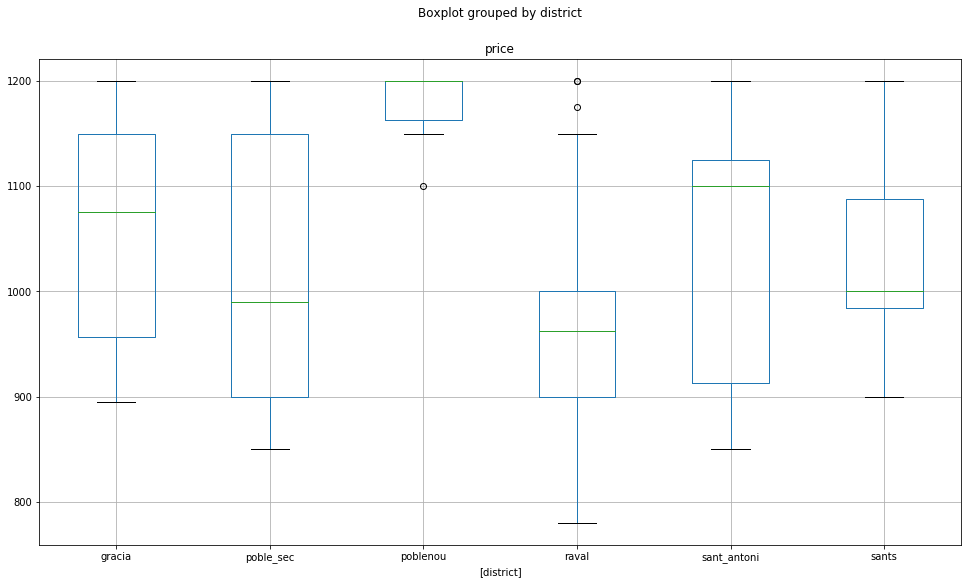

In [25]:
data.boxplot("price", by=["district"])

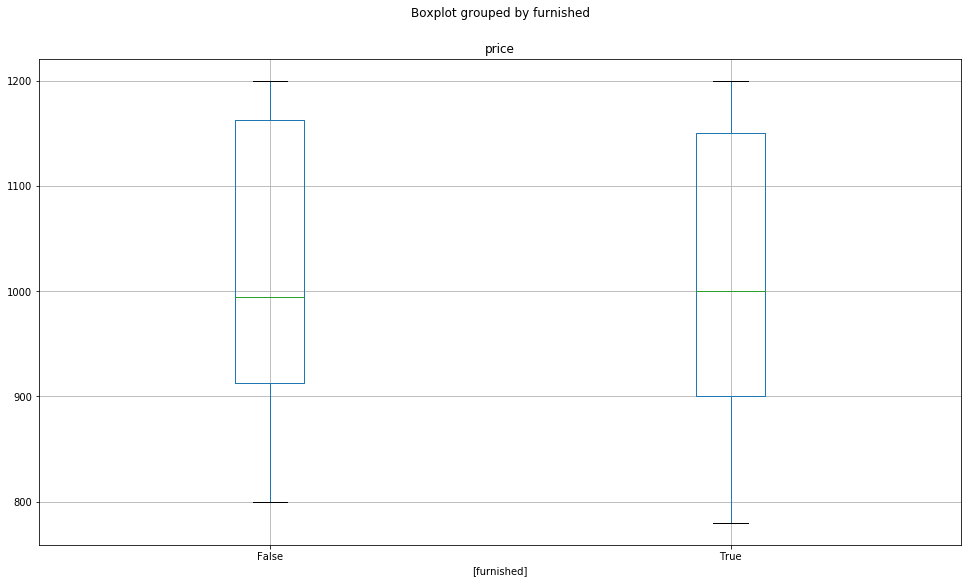

In [26]:
data.boxplot("price", by=["furnished"])

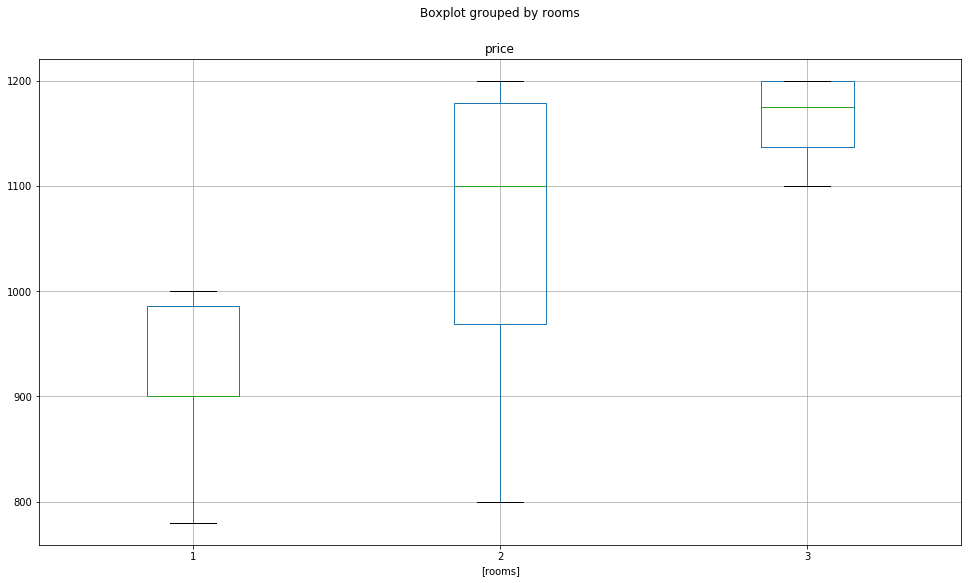

In [27]:
data.boxplot("price", by=["rooms"])

In [28]:
data["one_room"] = data["rooms"] == 1

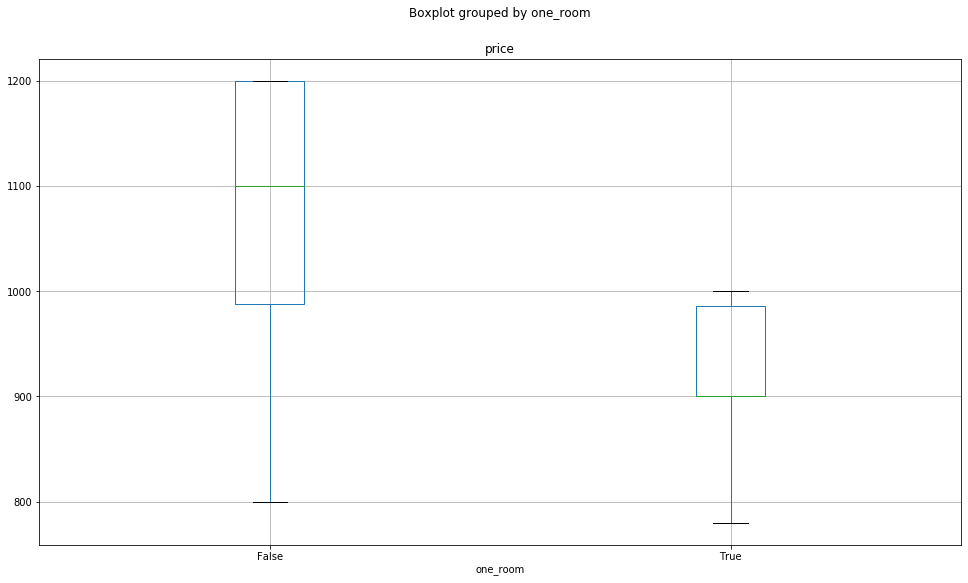

In [29]:
data.boxplot("price", by="one_room")

In [30]:
data.corr()

,price,square_meterage,rooms,floor,furnished,one_room
price,1.000000,0.520985,0.611906,-0.168413,-0.052625,-0.570817
square_meterage,0.520985,1.000000,0.533752,-0.341925,-0.052471,-0.492758
rooms,0.611906,0.533752,1.000000,-0.343566,-0.113325,-0.887794
floor,-0.168413,-0.341925,-0.343566,1.000000,-0.103511,0.351947
furnished,-0.052625,-0.052471,-0.113325,-0.103511,1.000000,0.127647
one_room,-0.570817,-0.492758,-0.887794,0.351947,0.127647,1.000000


In [31]:
def make_clickable(val):
    # target _blank to open new window
    return '<a target="_blank" href="{}">{}</a>'.format(val, val)

In [32]:
data["price_per_square_foot"] = data["price"] / data["square_meterage"]

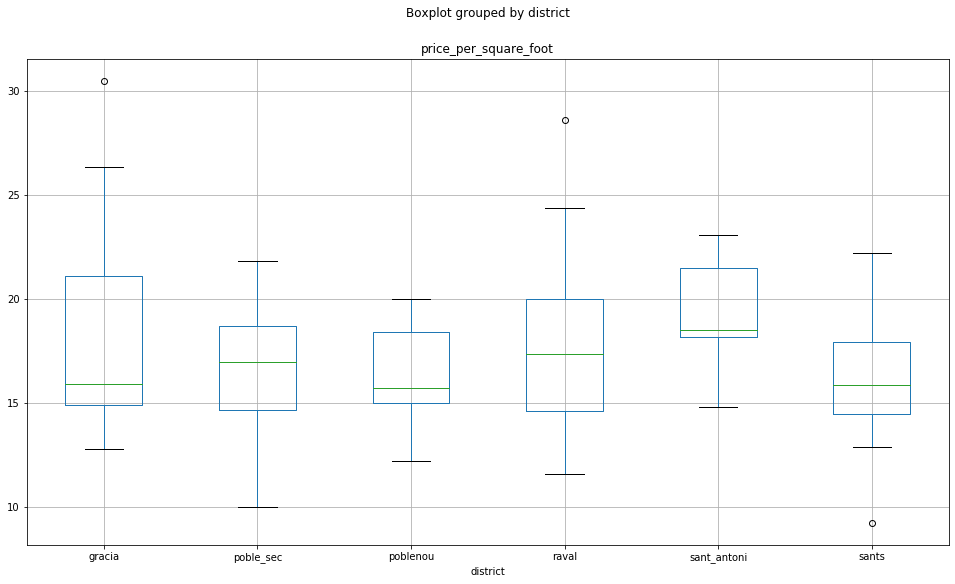

In [33]:
data.boxplot("price_per_square_foot", by="district")

In [34]:
data.sort_values("price_per_square_foot").style.format({'url': make_clickable})

,title,description,price,square_meterage,rooms,floor,furnished,district,url,one_room,price_per_square_foot
id,,,,,,,,,,,
83338906,"Piso en Caceres, Sants, Barcelona",Espectacular vivienda de 130m² construidos y 120m² útiles. Consta de 2 dormitorios arriba de la plataforma duplex. Totalmente amueblado y...,1200,130,2,nan,True,sants,https://idealista.com/inmueble/83338906/,False,9.23077
30425257,"Piso en calle Creu Dels Molers, 15, El Poble Sec - Parc de Montjuïc, Barcelona","Hola alquilo durante los meses de junio (a partir del 15) julio y Agosto. Es un piso muy espacioso, muy cómodo y acogedor. Tiene un sofá...",1200,120,3,1,True,poble_sec,https://idealista.com/inmueble/30425257/,False,10
85376917,"Piso en Hospital, 114, El Raval, Barcelona","CIUTAT VELLA - EN PLENO BARRIO DEL RAVAL Con Balcon a Calle Hospital y terracita a patio interior descubierto, con sol directo, con...",950,82,2,4,False,raval,https://idealista.com/inmueble/85376917/,False,11.5854
84518146,"Piso en Margarit, El Poble Sec - Parc de Montjuïc, Barcelona","Casa, duplex. Dos habitaciones dobles, comedor, cocina, dos baños. Terrazita. Electrodomesticos. Aire acomdicionado, Chimenea Casa, f...",1150,96,2,nan,False,poble_sec,https://idealista.com/inmueble/84518146/,False,11.9792
85533278,"Ático en Aurora, El Raval, Barcelona",Ático reformado con terraza de 6 metros por 4 muy soleada. Cocina / salón comedor /baño/Habitación Un luminoso y tranquilo.,900,75,1,5,True,raval,https://idealista.com/inmueble/85533278/,True,12
86609706,"Ático en pasaje IGLESIAS, El Poblenou, Barcelona",Poble nou. zona metro llacuna. atico completamente reformado. 75 metros + 15 m² de terraza. 3 dormitorios dobles. baño y aseo. balco...,1100,90,3,1,False,poblenou,https://idealista.com/inmueble/86609706/,False,12.2222
86516401,"Piso en travesía de Gràcia, 165, Vila de Gràcia, Barcelona","Piso de alquiler en Travessera de Gracia junto Torrent de l'Olla del barrio de Gracia (Barcelona), consta de 70 m2 de piso y 8 m2. de ter...",995,78,2,1,False,gracia,https://idealista.com/inmueble/86516401/,False,12.7564
86086858,"Piso en Torrijos, Vila de Gràcia, Barcelona","Piso en la calle Torrijos de 67 metros y 7 de terraza. Tiene salón-comedor exterior con salida a balcón, cocina independiente con pasaman...",950,74,2,0,False,gracia,https://idealista.com/inmueble/86086858/,False,12.8378
85954904,"Piso en plaza del Centre, Sants, Barcelona","Tu. house ALQUILA un Estupendo piso compartido y reformado que se encuentra en Plaça del Centre, en la planta 3ª sin ascensor, tiene 70 m...",900,70,2,3,False,sants,https://idealista.com/inmueble/85954904/,False,12.8571


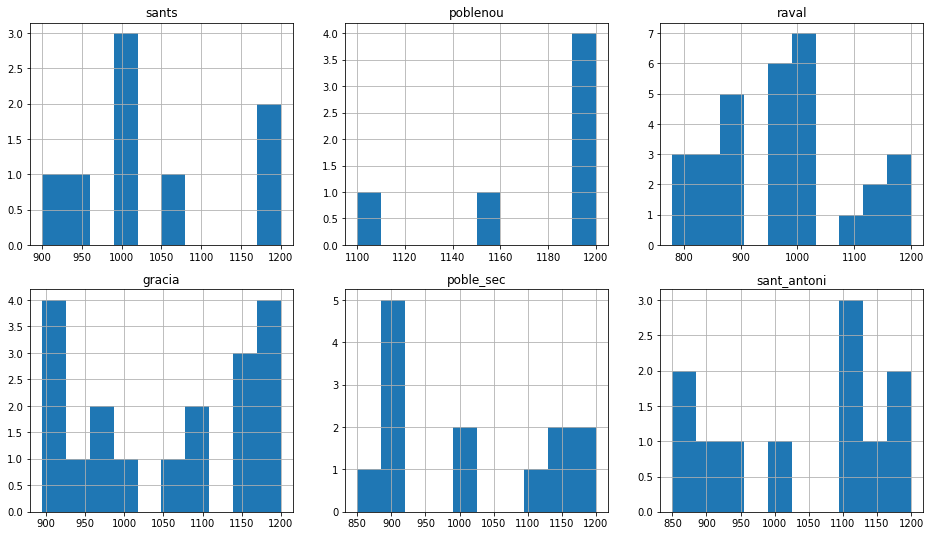

In [36]:
for (i, district) in enumerate(set(data["district"])):
    plt.subplot(2, 3, i+1)
    data[data.district == district]["price"].hist()
    plt.title(district)
plt.show()

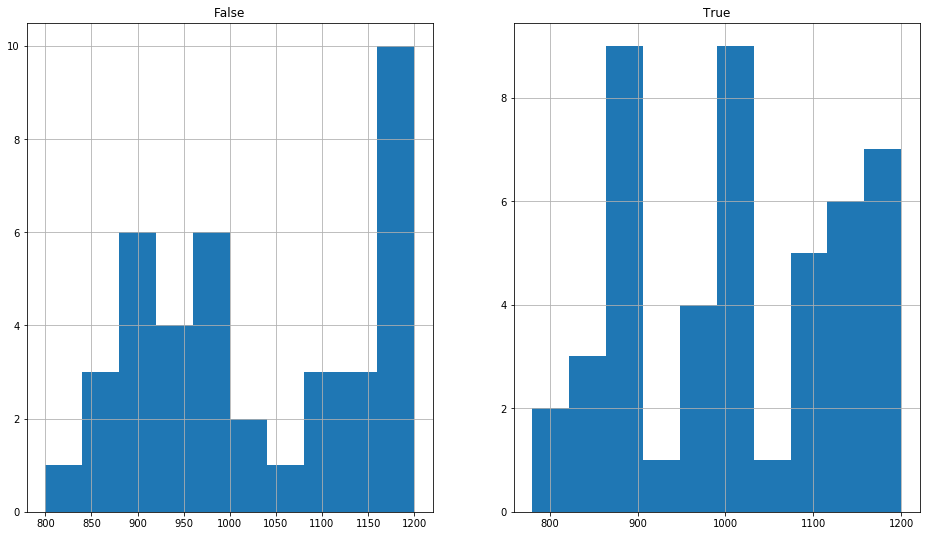

In [37]:
for (i, furnished) in enumerate(set(data["furnished"])):
    plt.subplot(1, 2, i+1)
    data[data.furnished == furnished]["price"].hist()
    plt.title(furnished)
plt.show()

In [38]:
data.groupby("district").count()[["url"]]

,url
district,
gracia,18
poble_sec,13
poblenou,6
raval,30
sant_antoni,11
sants,8


In [39]:
data.groupby("furnished").count()[["url"]]

,url
furnished,
False,39
True,47


In [40]:
data.groupby("one_room").count()[["url"]]

,url
one_room,
False,56
True,30
